In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/tisxo/Downloads/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
#원 핫 인코딩
df

,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_I,Sex_M
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,False,True
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,False,True
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,False,False
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,False,True
4,4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4172,4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,False,False
4173,4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,False,True
4174,4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,False,True
4175,4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,False,False


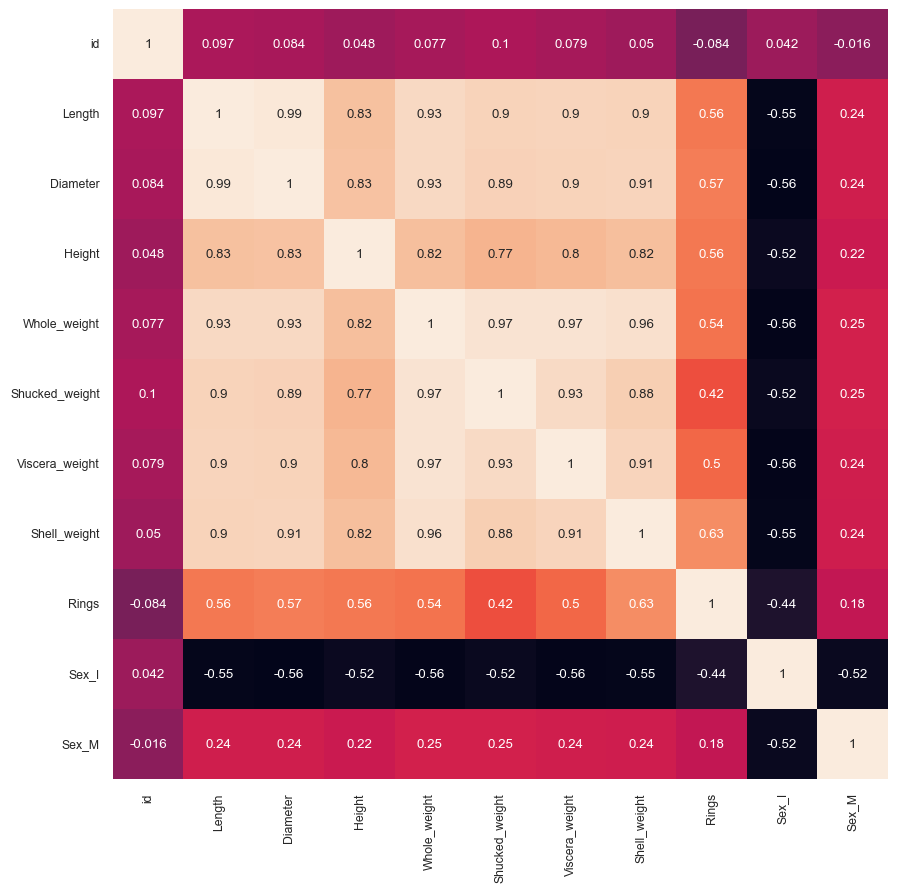

In [11]:
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# PRICE와 높은 건  MedInc

In [13]:
X = df.drop('Rings',axis=1)
X.head()

,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,False,True
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,False,True
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,False,False
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,False,True
4,4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,True,False


In [15]:
y = df['Rings']
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3341, 10) (3341,)
(836, 10) (836,)


In [21]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error



model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

평균제곱근오차 4.501829496419424


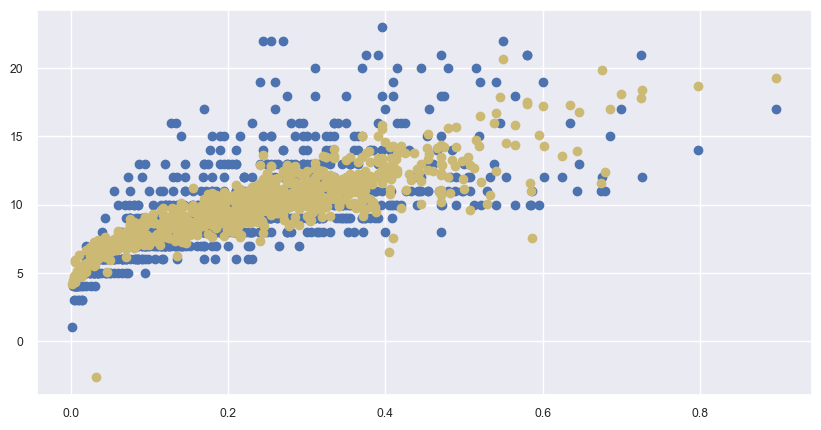

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

In [25]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 7.576555023923445


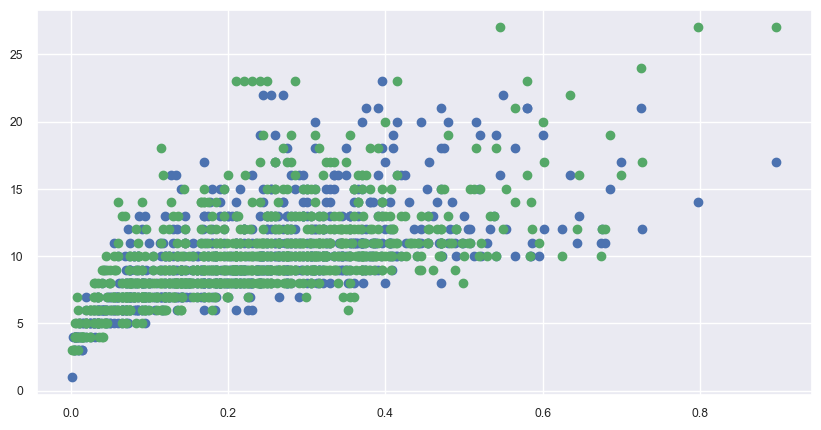

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], dy_preds, c='g', label='dy_preds')
plt.show()       

In [29]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 3.397114832535885


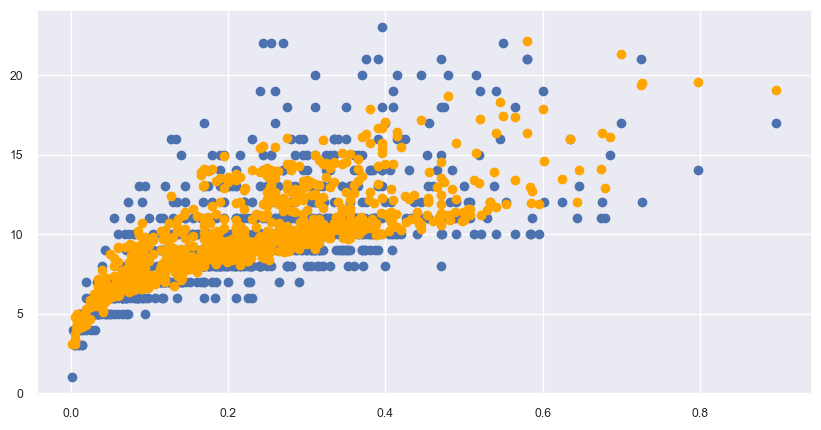

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ry_preds, c='orange', label='ry_preds')

plt.show()   